In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import sys

In [18]:
# filename = "sample_fuellstandsensoren-glassammelstellen-weissglas.csv"
# filename = "fuellstandsensoren-glassammelstellen-weissglas.csv"
filename = "C:/Users/n3xed/OneDrive - OST/Hackathon 2023/fuellstandsensoren-glassammelstellen-gruenglas.csv"

sensor_data = pd.read_csv(filename, delimiter=";")
sensor_data['measured_at'] = pd.to_datetime(sensor_data['measured_at'], utc=True)

sensor_data

,measured_at,data,device_id,name,id,location,data_distance,geo_point_2d
0,2021-01-31 15:22:07+00:00,"{""type"": ""reading"", ""distance"": 752}",a3e91e80-9b8d-4bd6-bbd7-011319e05a0c,107068 | 4455,ecaef64e-a8c5-4f88-a55b-9f0e081f2186,"{""coordinates"": [9.33586, 47.41208], ""type"": ""...",752.0,"47.41208, 9.33586"
1,2021-01-31 15:12:43+00:00,"{""type"": ""reading"", ""distance"": 946}",62ec2345-9665-4fd2-9fa7-91ead95dc99b,107031 | 6348,49fe8b11-0763-4061-bd69-c75934647adb,"{""coordinates"": [9.29952, 47.40395], ""type"": ""...",946.0,"47.40395, 9.29952"
2,2021-01-31 15:07:26+00:00,"{""type"": ""reading"", ""distance"": 2500}",b5b36857-0f47-4df9-8c8a-0ff431875b18,104246,63725eec-c2b4-4f97-817b-24c840ae4858,"{""coordinates"": [9.36637, 47.41634], ""type"": ""...",2500.0,"47.41634, 9.36637"
3,2021-01-31 15:07:21+00:00,"{""type"": ""reading"", ""distance"": 817}",b4d0f672-6436-483e-a0cd-fab4fe552a8c,104243,c8021cfe-42de-49ca-b647-1343fbb7e34c,"{""coordinates"": [9.37393, 47.42701], ""type"": ""...",817.0,"47.42701, 9.37393"
4,2021-01-31 15:07:12+00:00,"{""type"": ""reading"", ""distance"": 1462}",0b011106-e5fe-4202-92bd-c89abd042249,107122 | 6370,b8c953d9-e0dd-408b-9b93-a9525ca9ec0e,"{""coordinates"": [9.391775426347124, 47.4351716...",1462.0,"47.435171633333255, 9.391775426347124"
...,...,...,...,...,...,...,...,...
893269,2023-10-23 19:20:12+00:00,"{""type"": ""reading"", ""distance"": 1548}",496ebab5-e27f-46a4-91bd-28e5086eb594,107108 | 0AEA,38466389-e8de-4608-92df-c743234e4aa4,"{""coordinates"": [9.38204, 47.42595], ""type"": ""...",1548.0,"47.42595, 9.38204"
893270,2023-10-23 18:50:33+00:00,"{""type"": ""reading"", ""distance"": 1397}",a3e91e80-9b8d-4bd6-bbd7-011319e05a0c,107068 | 4455,3af5412d-d8c9-482d-ade0-f3d059023cf5,"{""coordinates"": [9.33586, 47.41208], ""type"": ""...",1397.0,"47.41208, 9.33586"
893271,2023-10-23 18:50:13+00:00,"{""type"": ""reading"", ""distance"": 1548}",496ebab5-e27f-46a4-91bd-28e5086eb594,107108 | 0AEA,819309f1-391a-4c1b-9800-04579cb0c45e,"{""coordinates"": [9.38204, 47.42595], ""type"": ""...",1548.0,"47.42595, 9.38204"
893272,2023-10-23 18:09:26+00:00,"{""type"": ""reading"", ""distance"": 924}",7f9cad51-8a0c-4fa9-a6d4-8cf649d819ab,107048 | 671B,5b378e43-d340-47c2-82b6-6f9e78fcda61,"{""coordinates"": [9.38269, 47.41539], ""type"": ""...",924.0,"47.41539, 9.38269"


In [19]:
sensors = sensor_data[["name", "device_id", "geo_point_2d"]].groupby("name").first()
sensors

,device_id,geo_point_2d
name,,
104243,b4d0f672-6436-483e-a0cd-fab4fe552a8c,"47.42701, 9.37393"
104246,b5b36857-0f47-4df9-8c8a-0ff431875b18,"47.41634, 9.36637"
104249,e3a7cfea-c281-46fe-8758-0bf2388181c0,"47.4425, 9.39485"
107029 | 6436,79d9a5cb-3704-4a21-aedf-5989c70baed0,"47.40365, 9.33947"
107031 | 6348,62ec2345-9665-4fd2-9fa7-91ead95dc99b,"47.40395, 9.29952"
107034 | 8104,134fc269-ec25-466f-82e7-780beb314108,"47.43919, 9.40665"
107036 | 2AA8,1607ca61-c966-483d-bbfb-d97027d507c1,"47.43919080897871, 9.406640025383552"
107038 | 2B8D,cfcfb74d-b13e-43fb-bc59-9eee4f6be818,"47.41086, 9.36611"
107041 | 470A,11d4bcfe-bde2-42bd-8ebc-43ee77012480,"47.41960640999497, 9.346374054498114"


In [20]:
rel_data = sensor_data[["name", "measured_at", "data_distance"]].sort_values(by="measured_at").copy()
rel_data["measured_at"] = rel_data["measured_at"].dt.tz_convert("Europe/Berlin").map(pd.Timestamp.timestamp)

rel_data = list(rel_data.groupby("name"))
rel_data

[('104243',
            name   measured_at  data_distance
  231027  104243  1.592317e+09         1419.0
  777122  104243  1.592319e+09         1419.0
  529395  104243  1.592321e+09         1376.0
  76118   104243  1.592323e+09         1397.0
  352363  104243  1.592325e+09         1311.0
  ...        ...           ...            ...
  849974  104243  1.700698e+09         2500.0
  849971  104243  1.700700e+09         2500.0
  872334  104243  1.700701e+09         2500.0
  891712  104243  1.700703e+09         2500.0
  851025  104243  1.700705e+09         2500.0
  
  [54246 rows x 3 columns]),
 ('104246',
            name   measured_at  data_distance
  555711  104246  1.577837e+09            NaN
  424504  104246  1.577839e+09            NaN
  424500  104246  1.577841e+09            NaN
  533736  104246  1.577842e+09            NaN
  555699  104246  1.577844e+09            NaN
  ...        ...           ...            ...
  804944  104246  1.617095e+09         2500.0
  96651   104246  1.6171

In [21]:
i = 10

data_dist = np.array(rel_data[i][1]["data_distance"])
data_time = np.array(rel_data[i][1]["measured_at"])

In [22]:
for i in range(len(data_dist)):
    if np.isnan(data_dist[i]) or data_dist[i] == np.inf or data_dist[i] == -np.inf:
        data_dist[i] = data_dist[i-1] if not np.isnan(data_dist[i-1]) else 0.0

In [23]:
import scipy.signal as signal 
import scipy
import scipy.ndimage as ndimage

# data_dist_filt
# data_dist_filt = ndimage.gaussian_filter1d(data_dist, sigma=20)
# data_dist_filt = np.zeros_like(data_dist)
# data_dist_filt = signal.savgol_filter(data_dist, 51, 3)
data_dist_diff = np.zeros_like(data_dist)
data_dist_diff[0:len(data_dist)-1] = np.diff(data_dist, n=1)


In [24]:
def reject_outliers(data: np.ndarray, threshold=600):
    filt = data.copy()
    diff = np.diff(data, n=1)
    last_peak_i = None
    last_peak_pos_edge = None
    for i, v in enumerate(diff):
        if abs(v) > threshold:
            is_pos_edge = np.sign(v) > 0
            if last_peak_i is None or is_pos_edge == last_peak_pos_edge:
                last_peak_i = i
                last_peak_pos_edge = is_pos_edge
            elif is_pos_edge != last_peak_pos_edge:
                filt[last_peak_i:i+1] = data[last_peak_i-1]
                last_peak_i = None
        if i - (last_peak_i or 0) > 100:
            last_peak_i = None
    return filt

data_dist_filt = reject_outliers(reject_outliers(data_dist))
# data_dist_filt = signal.savgol_filter(data_dist_filt, 20, 3)
data_dist_filt_diff = np.diff(data_dist_filt, n=1)
data_dist_filt_gauss = ndimage.gaussian_filter1d(data_dist_filt, sigma=2)

In [25]:
peaks, _ = signal.find_peaks(np.diff(data_dist_filt_gauss), prominence=60)
peaks = [*peaks[1:], len(data_dist_filt)]

data_filt = pd.DataFrame({"dist": data_dist_filt}, index=data_time)
# data_filt

time_regions = [data_time[peaks[n]+1:peaks[n+1]] for n in range(len(peaks)-1)]
dist_periods = [ndimage.gaussian_filter1d(data_dist_filt[peaks[n]+1:peaks[n+1]], sigma=2) for n in range(len(peaks)-1)]

# plt.plot(np.diff(data_dist_filt, n=1)[20000:30000])
# plt.figure()
# plt.plot(data_dist_filt[20000:30000])

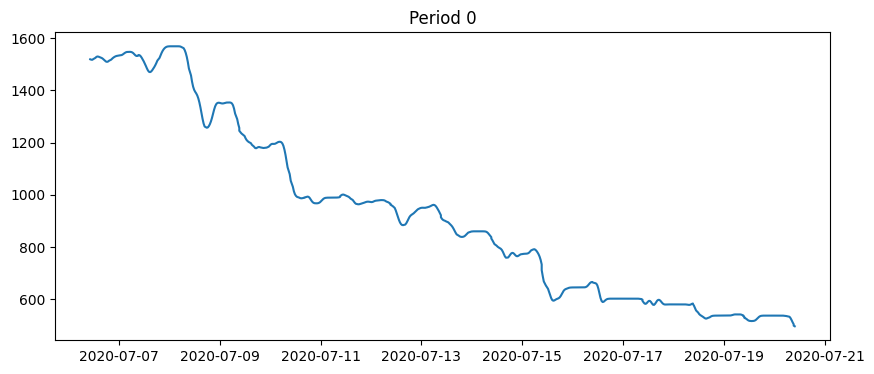

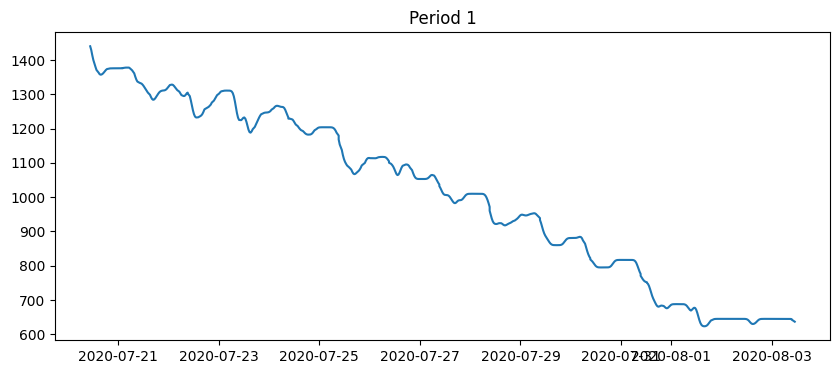

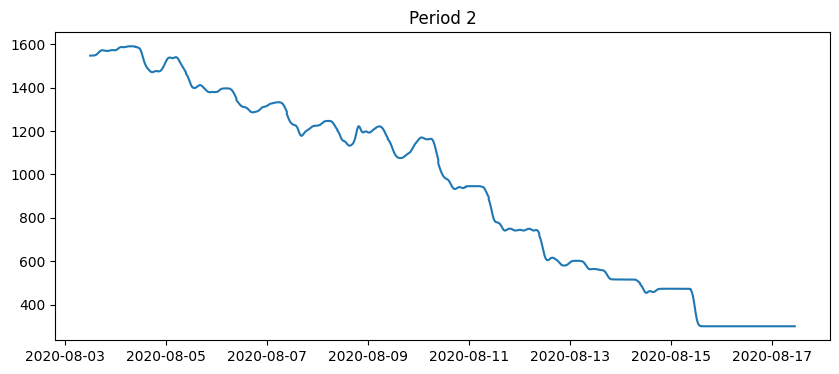

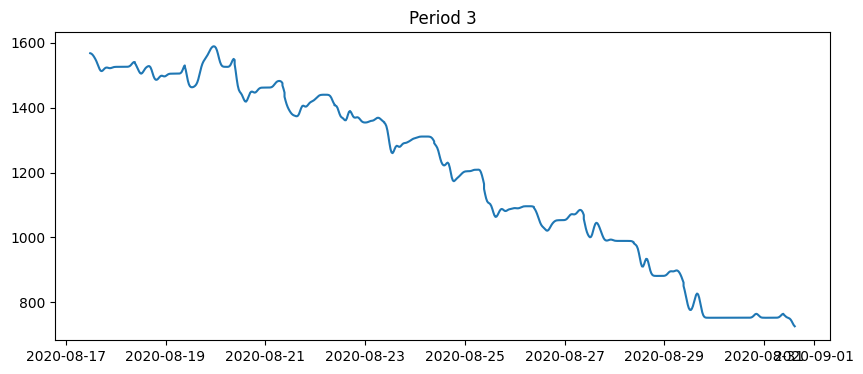

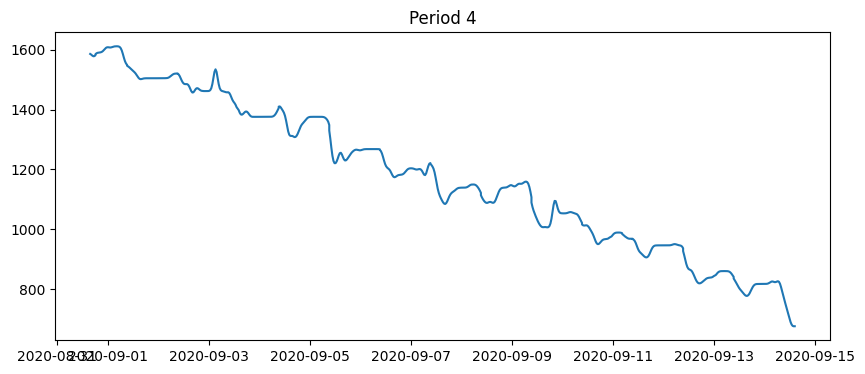

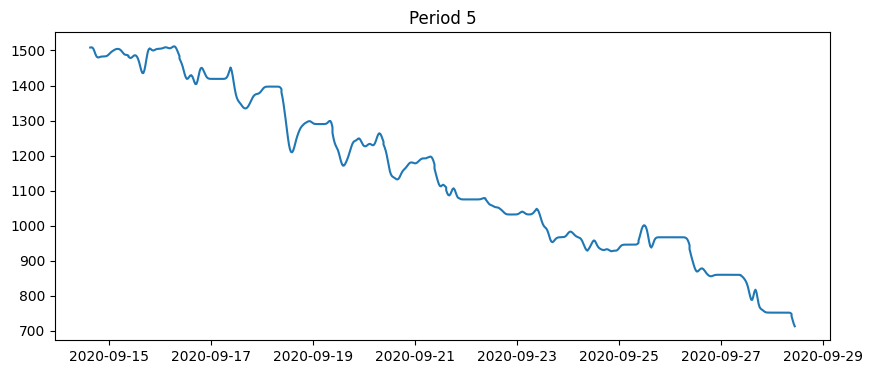

In [26]:
for i, (time, period) in enumerate(zip(time_regions, dist_periods)):
    if i > 5:
        break
    plt.figure(figsize=(10, 4))
    plt.title(f"Period {i}")
    plt.plot([datetime.datetime.fromtimestamp(t) for t in time], period)

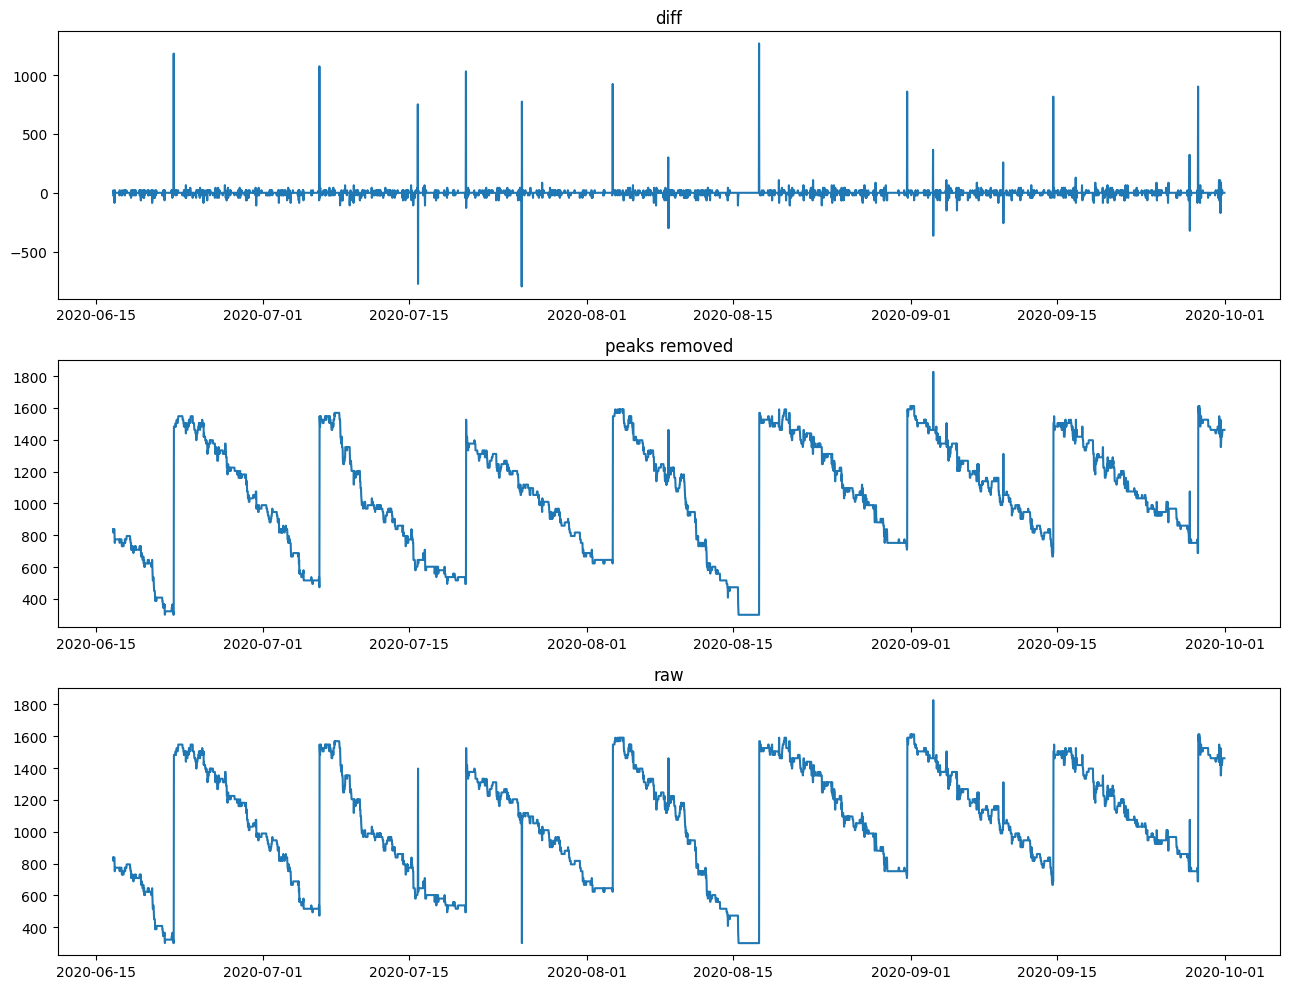

In [33]:
# %matplotlib widget
# import matplotlib
# matplotlib.use("Qt5Agg")

# data_time_mask = (data_time >= datetime.datetime(2023, 1, 1).timestamp()) & (data_time <= datetime.datetime(2023, 8, 29).timestamp())
data_time_mask = (data_time <= datetime.datetime(2020, 10, 1).timestamp()) #& (data_time >= datetime.datetime(2020, 6, 1).timestamp())
# data_time_mask = np.ones_like(data_time, dtype=bool)

fig, axs = plt.subplots(nrows=3, figsize=(13, 10))
axs[0].plot(list(map(datetime.datetime.fromtimestamp, data_time[data_time_mask])), data_dist_diff[data_time_mask])
axs[0].set_title("diff")
axs[1].plot(list(map(datetime.datetime.fromtimestamp, data_time[data_time_mask])), data_dist_filt[data_time_mask])
axs[1].set_title("peaks removed")
axs[2].plot(list(map(datetime.datetime.fromtimestamp, data_time[data_time_mask])), data_dist[data_time_mask])
axs[2].set_title("raw")
fig.set_tight_layout(True)